In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound
%matplotlib inline

In [2]:
# pyplot parameters
plt.rc('lines', linewidth=3, markersize=2)
plt.rc('font', size=20, family='serif', weight=200)
plt.rc('mathtext', fontset = 'stix')
plt.rc('axes', linewidth=2)
plt.rc('patch', linewidth=3)
plt.rc('xtick.major', width=1.5, size=6)
plt.rc('ytick.major', width=1.5, size=6)

In [3]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Earth")
sim.add("Venus")
sim.add("Jupiter")
sim.move_to_com()

sim.integrator = "ias15"
sim.automateSimulationArchive("sun-earth-venus-jupiter.bin",interval=1e1,deletefile=True)
sim.integrate(2*np.pi*1e3)

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).


In [4]:
sa = rebound.SimulationArchive("sun-earth-venus-jupiter.bin")
# other archives are "sun-earth.bin", "sun-earth-venus.bin", "sun-earth-jupiter.bin"

a = np.zeros(len(sa))
e = np.zeros(len(sa))
time = np.zeros(len(sa))

for i, sim in enumerate(sa):
    time[i] = sim.t/(2*np.pi)
    a[i] = sim.particles[1].a
    e[i] = sim.particles[1].e

Text(0.5,0,'time (years)')

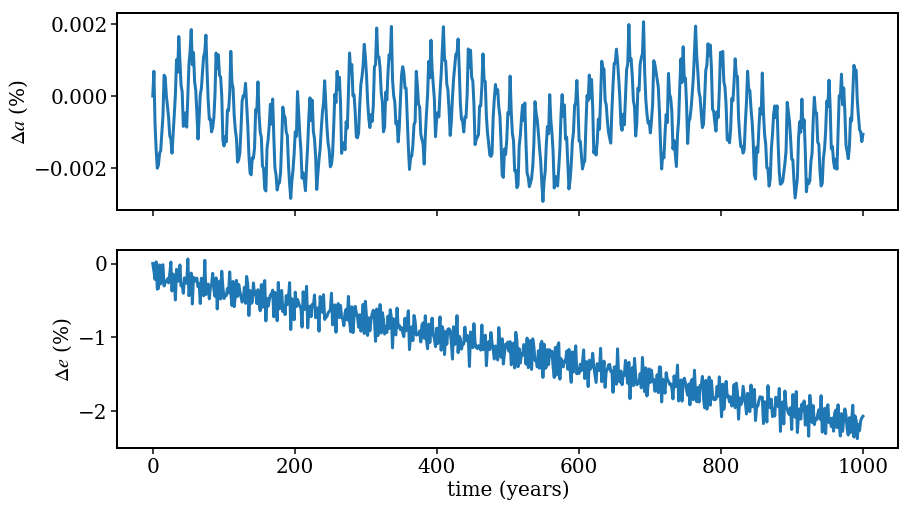

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(14,8), sharex=True)

ax0 = ax[0]
ax1 = ax[1]

ax0.set_ylabel('$\Delta a$ (%)')
ax0.plot(time,100*(a-a[0])/a[0],'-')

ax1.set_ylabel('$\Delta e$ (%)')
ax1.plot(time,100*(e-e[0])/e[0],'-')

ax1.set_xlabel('time (years)')